# PROJECT 1
## Supervised learning of the dataset "StudentPerfomanceFactors"


### Overview
In this notebook,...

### Importing the librairies


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error

%matplotlib inline

### Exploring the data

In [2]:
df = pd.read_csv("StudentPerformanceFactors.csv", encoding='ISO-8859-1')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


<Axes: ylabel='Frequency'>

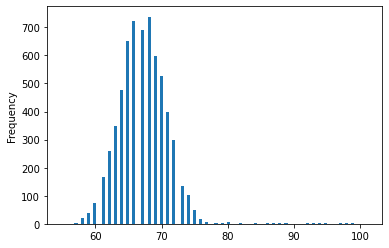

In [7]:
df = df.dropna()
df["Exam_Score"].plot.hist(bins= 100)
print(f'Number of students with grade >= 80: {len(df[df["Exam_Score"] > 80])}')

In [31]:
df = pd.get_dummies(df)
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Extracurricular_Activities_No,...,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male
0,23,84,1,3,7,73,0,3,67,True,...,True,False,False,True,False,False,False,True,False,True
1,19,64,1,2,8,59,2,4,61,True,...,True,False,True,False,False,False,True,False,True,False
2,24,98,2,2,7,91,2,4,74,False,...,True,False,False,False,True,False,False,True,False,True
3,29,89,1,2,8,98,1,4,71,False,...,True,False,False,True,False,False,True,False,False,True
4,19,92,2,2,6,65,3,4,70,False,...,True,False,True,False,False,False,False,True,True,False


<Axes: >

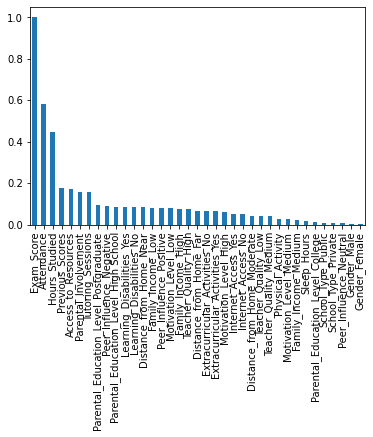

In [53]:
correlation_matrix = df.corr()

# Extraire les corrélations avec la variable cible
correlation_with_target = correlation_matrix['Exam_Score'].abs().sort_values(ascending=False)
correlation_with_target.plot.bar()

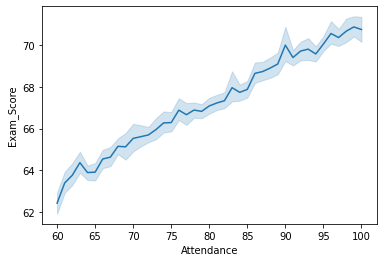

In [72]:
sns.lineplot(x='Attendance', y='Exam_Score', data=df)
plt.show()

In [64]:
y = df["Exam_Score"]
X = df.drop("Exam_Score", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
model_linReg = LinearRegression()
model_linReg.fit(X_train, y_train)

LinearRegression()

In [65]:
model_deciTree = DecisionTreeRegressor()
model_deciTree.fit(X_train, y_train)

DecisionTreeRegressor()

In [66]:
y_pred = model_linReg.predict(X_test)
mae_linReg = mean_absolute_error(y_test, y_pred)

y_pred = model_deciTree.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)



print(f"mae: {mae}")


mae: 1.686838124054463


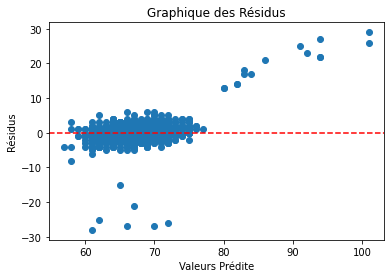

In [67]:
plt.scatter(y_pred, y_pred - y_test)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valeurs Prédite')
plt.ylabel('Résidus')
plt.title('Graphique des Résidus')
plt.show()